In [6]:
import warnings
import datetime

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib_venn as venn

from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles

sns.set()
warnings.filterwarnings('ignore')

In [7]:
def printmd(string): display(Markdown(string))
def latex(out): printmd(f'{out}')  
def pr(string): printmd('***{}***'.format(string))

<h1 face = "Times New Roma" color='#3f134f'  > Probability basics </h1>

<h6>
  <font size="4" face = "Times New Roma" color='#3f134f' > 
    <ul style="margin-left: 30px">
      <li><a href='#abstract'>Abstract </a> </li> <br>
      <li><a href='#head1'>How the probabilities depend on the number of experiments</a> </li><br>
      <li><a href='#alg'>Algebra of events</a> </li><br>  
      <li><a href='#cond'>Conditional probability</a> </li><br>  
      <li><a href='#bayes'> Bayes's Theorem</a> </li><br>
        <li><a href='#random'>Discrete random variables </a> </li><br> 
         <li><a href='#expectation'>Variance and Standard Deviation</a> </li><br> 
        
</ul>    
 </font>
  </h6>
  

<font size="1" id="abstract">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Abstract</h2>

<font face = "Times New Roma" size="4.5"  color='#270336' >
    &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;Basic concepts of Probability theory with examples executed by  <mark>NumPy.random</mark>
</font>    

<font size="1" id="head1">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; How the probabilities depend on the number of experiments</h2>

<font face = "Times New Roma" size="4.5"  color='#270336' >
&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp; The probability is math theory and approach to the quantitative the randomness events around us. That allows us to analyze the  chance  of events in a logically sound manner. The probability P is a real number between $[0,1]$ indicating how likely  some event will occur. The most popular example is the tossing of a fair coin, in which possible outcomes are head and tail denoted by $S = [H, T]$. $S$ is called sample space or all unique possible outcome or just $set$ of all possible results. The probability of flipping  Head or Tail is equal to $\frac{1}{2}$ 50% . What does 50%  means  ?
</font>    

<h6> 
    <font size="3" color='#270336' face = "Times New Roma" >
        &nbsp;&nbsp; We will use the random library of $NumPy$ in order to perform experiments based on randomness. <br>
</font>    
</h6>  
  

In [3]:
def random_experiment(N , sample, times=1, custom_handler=None ):
    '''
    Perform of random experiment
    
    
    Parameters:
     N : int 
     number of experiments which will be performed
   
    sample : ndarray
     The set from which will be chosen a random element
     
    times : int
      number of outcomes related to one experiments
     
    custom_handler : call function 
     provides ability for custom experiment  
     
     return : ndarray
       result of experiments
    
    '''
    result = np.array([])
    for i in range(N) :
        experiment_result = [np.random.choice(sample) for i in range(times)]
        
        if custom_handler is not None:
            experiment_result = custom_handler(experiment_result)
            
        result =np.append(result, experiment_result)    
    
    return np.array(result) 


def hist(N , sample, times=1, experiment=None,dist=False, **kwargs) :
    '''
    wrapper function of random_experiment for plotting of result in histogram 
    
    Parameters :
      kwards : map
      properties for histogram
    
    '''
    data = random_experiment(N ,sample ,times=times,custom_handler = experiment)
    
    l = 'Count experiments:{}'.format(N)
    axes =plt.gca()

    
   
    bins = None
    for key, value in kwargs.items(): 
        if key=='title' :
            title =  value 
        elif key=='figsize':
            pass
        elif key == 'y_size':    
            axes.set_ylim(value)  
        elif key == 'bins' :
            bins = value    
        elif key == 'y_scalled':
             axes.set_ylim(value)
    if dist :      
         plt.hist(data, bins=bins,label=l)
    else :        
        plt.hist(data , weights=np.ones(len(data)) / (len(data)) , bins=bins,alpha = 0.4,label=l, histtype='bar', rwidth=1)  
        axes.yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
    plt.title(title)        
    plt.legend()

<font face = "Times New Roma" size="3"  color='#270336' >
&nbsp;&nbsp;&nbsp; When we flip a coin the sample space is $$S = [H,T]$$
For the fair coin, we expect 50% for occurring both $H$ and $T$. That means if we perform many experiments, we expect that half of all possible outcomes will be H (or just will tend to Head) the remaining ones will be the T moreover, our result depends on the number of experiments and result gets closer to our expectations when  the number of experiments increases

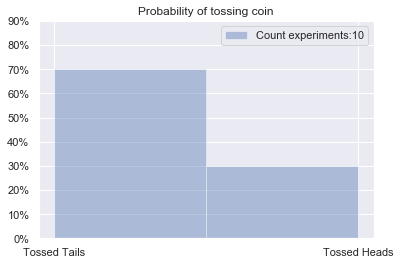

In [13]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    if arg[0] == 'H':
        return 'Tossed Heads'
    else:
        return 'Tossed Tails'
hist(10,sample_space, 1 ,experiment = experiment,title='Probability of tossing coin',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4.5"  color='#270336' >
   In the above histogram, we see that the $70$% of outcomes are Heads and 30% are Tail. The result is not as we expected since the number of experiments is 10 which is too small. 
</font>    

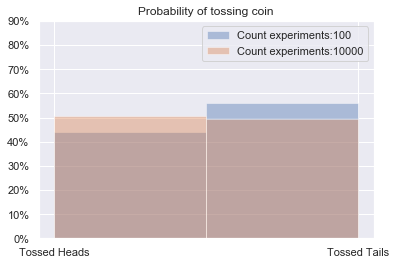

In [14]:
sample_space = np.array(['H','T'])
hist(100,sample_space, 1 ,experiment = experiment,title='Probability of tossing coin',bins=2,y_scalled=(0,0.9))
hist(10000,sample_space, 1 ,experiment = experiment,title='Probability of tossing coin',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4.5"  color='#270336' >
  In the above histogram, the blue color refers to  100  experiments and brown to 10000. It is obvious that when the number of experiments is increased then  H and T get closer to 50%.
</font>    

<font face = "Times New Roma" size="4.5"  color='#270336' >
  
When we toss a coin 3 times and record the results in the sequence that they occur, then the sample space is <br> <br>
$$ S = [ HHH,\; HHT,\; HTH ,\; HTT ,\; THH ,\; THT ,\; TTH ,\; TTT ]$$
<br>    
Thus the probability to occur $HTT$ is equal to $\frac{1}{len(S)}= \frac{1}{8}=12$%.
Let to pefrom an exeriment.    
</font>    

In [17]:
def experiment(arg) :
    if arg[0] == 'H' and arg[1]=='T' and arg[2]=='T':
        return 'HTT'
    else:
        return 'not HTT'

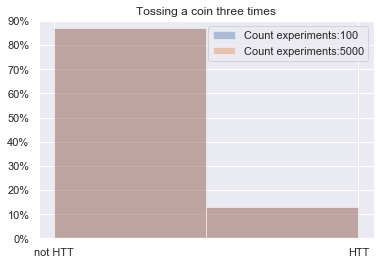

In [18]:
hist(100,sample_space,times = 3, experiment = experiment,title='Tossing a coin three times',bins=2,y_scalled=(0,0.9))
hist(5000,sample_space,times = 3, experiment = experiment,title='Tossing a coin three times',bins=2,y_scalled=(0,0.9))


<font face = "Times New Roma" size="4.5"  color='#270336' >
 We see in 5000 experiments the probability of occuring HTT tends to 12%
</font>    

<font size="1" id="alg">... </font> 
<h2 face = "Times New Roma" color='#270336' >&nbsp; Algebra of events</h2>

<font face = "Times New Roma" size="4"  color='#270336' >
Since events are sets, wich are just subsets of the sample space $S$, we can do the usual $\displaystyle set $ operations.
</font>    

<h3  color='#270336' style="margin-right: 45px; margin-left: 55px">
    <font face = "Times New Roma" size="4"  color='#270336' >
        union or $OR$ denoted by $\cup$ <br>
        intersection or $AND$ denoted by $\cap$ <br>
        complement $\overline E$ or $E^c$ or $S/E$ every event $F\in S$  except  E or just $not\; E$
    </font>    
</h3>  
    

<font face = "Times New Roma" size="4"  color='#270336' >
Axioms of probability:
</font>    
<h3  color='#270336' style="margin-right: 45px; margin-left: 55px">
    <font face = "Times New Roma" size="4"  color='#270336' >
     1. for any event $E \in S$,  $0 \leq P(A) \leq 1$ <br> <br>
     2. P(S) = 1 <br> <br>
    3 . for any counably infinite sequence of  events $(E_i)$ that are mutualy exclusive (i.e $E_i  \cap E_j = \emptyset $if $i\ne j)$ satisfy <br>
  $P(\cup E_i)=\sum_iP(E_i)$
  </font>    
</h3>  
        

<h6> 
    <font size="3" color='#270336' face = "Times New Roma" >
        &nbsp;&nbsp;First let to include the Venn diagrams <br>
</font>    
</h6>  
  

In [26]:
def plot_ven(A,B,S,intersect=False,label_f=False):
    v = venn3([A,B,S], ('A', 'B', 'S'))
    s_t = b_a = ab= a_b = ' '
    if label_f :
        s_t = r'$S | (A\cup B)$'
        b_a = r'$B | (A\cap B)$ '
        a_b = r'$A | (B\cap A) $'
        ab = r'$A\cap B $'
        
    v.get_label_by_id('001').set_text('\n'.join(S - A - B) +' \n' +s_t ) 
    v.get_label_by_id('011').set_text('\n'.join(B- (A&B) ) +' \n' +b_a ) 
    if intersect:
        v.get_label_by_id('111').set_text('\n'.join(A&B ) +' \n' +ab ) 
    v.get_label_by_id('101').set_text('\n'.join(A - (A&B))  +' \n' +a_b)

<font face = "Times New Roma" size="4"  color='#270336' >
  example: <br>
    In fliping the coin tree times the sample space  is $S=S = [HHH , HHT , HTH , HTT , THH , THT , TTH , TTT]$. <br> 
    if we   define events $A= [HHH]$ (only H is occured) and event $B = [TTT]$(only T is occured) using the $Venn$ diagrams
    we can represent the events in folowing form.
</font>    

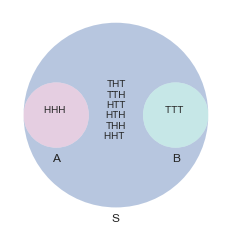

In [27]:
S = set(['HHH' , 'HHT' , 'HTH' , 'HTT' , 'THH' , 'THT' , 'TTH' , 'TTT']) # sample space
A = set(['HHH']) # event A
B = set(['TTT']) # event B

plot_ven(A,B,S)

<font face = "Times New Roma" size="4"  color='#270336' >
From Venn diagram we can see that $A \cap B = \emptyset$ that means A and B are independent events and mutualy exclusive . $p(A) = \frac{1}{8},\;\; p(B) = \frac{1}{8}$  <br>
 if  apply axiom 3 <br>
$p(A \cup B) = p(A) + p(B) = \frac{1}{8} + \frac{1}{8} = \frac{1}{4} = 25$% <br>
Let experiment it.   
</font>    

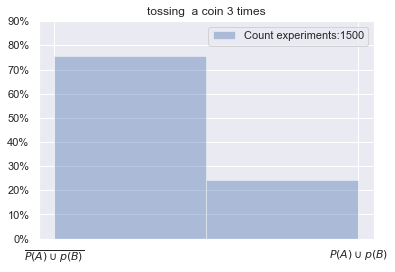

In [32]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    if arg == ['H','H','H'] or arg == ['T','T','T']:
        return r'$P(A)\cup p(B)$'
    else:
        return r'$\overline{P(A)\cup p(B)}$'
hist(1500,sample_space, times=3 ,experiment = experiment,title='tossing  a coin 3 times',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4"  color='#270336' >
 Ok ! the  histogram confirm above result. <br> <br>
    Let to define some useful properties.
 </font>   

<h3  color='#270336' style="margin-right: 45px; margin-left: 55px">
<font face = "Times New Roma" size="4"  color='#270336' >
   property 1 . since $A\cup \overline A = S$ and sing axioms 2 and 3 we can write. <br> <br>
     $ p(A\cup \overline A) = p(A) + p(\overline A)=1$ <br>
 $\Rightarrow p(A) = 1-p(\overline A)$
  </font>    
</h3>  

<font face = "Times New Roma" size="4"  color='#270336' >
example : <br>
     let event A is $A = [HHH, HHT, HTH , HTT, THH, THT,TTH' ]$ (occurring at least one H) then 
    $\overline A=[TTT]$ (not occurring H) <br> 
    applying pr.(1) we write $p(A) = 1 - p(\overline A ) = 1 - \frac{1}{8} =  88$%
</font>    

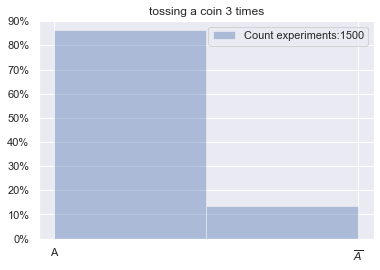

In [43]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    if arg[0] == 'H' or  arg[1] == 'H'   or arg[2] == 'H'  :
        return 'A'
    else:
        return r'$\overline{A}$'
hist(1500,sample_space, times=3 ,experiment = experiment,title='tossing a coin 3 times',bins=2,y_scalled=(0,0.9))

<h3  color='#270336' style="margin-right: 45px; margin-left: 55px">
<font face = "Times New Roma" size="4"  color='#270336' >
property 3 :
    if any two events $A,B \in S$( dependent or indetependent ) satisfy<br>
    $$p(A \cup B ) = p(A) + p(B) - p(A \cap B)$$
</font>
</h3>
<font face = "Times New Roma" size="4"  color='#270336' >
The Venn diagram  help us to  understand why  property 3 is correct !
exampe : <br>
Again tosing  a coin 3 times  and $S = [HHH , HHT , HTH , HTT , THH , THT , TTH , TTT]$
 <br> 
Let event $A = [HHH,HHT,HTH,THH] $ (to ccour H at least 2  times)  the probability of event A is $ p(A) = \frac{4}{8} = 50$% <br> <br>
let event $B = [THH,TTH,TTT] $ (first index(first time) refers to T) in this case the probability $p(B) = \frac{3}{8} = 37$% 
 <br> 
for the intersection $p(A \cap B) = [THH] $ the probability is $p(A \cap B) = \frac{1}{8} = 12 $%
<br>
</font>

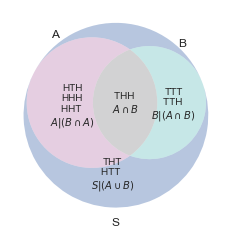

In [38]:
A = set(['HHH','HHT','HTH','THH'])
B = set(['THH','TTH','TTT'])

plot_ven(A,B,S,intersect=True,label_f=True)

<font face = "Times New Roma" size="4"  color='#270336' >
 From the Venn diagram the searching region can be found as
</font>    
<h3  color='#270336' style="margin-right: 45px; margin-left: 45px">
<font face = "Times New Roma" size="4"  color='#270336' >    
 $ p(A\cup B) = p(A / (B \cap A)) + p(B \cap A) +  p(B/(A \cap B))$
 <br> <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ = p(A) - p(B \cap A) + p(B \cap A) +  p(B) -  p(A \cap B)$ 
 <br> <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ = p(A)  +  p(B) -  p(A \cap B)$
 <br> <br>
if we plug  their probabily found avobe then we will achieve
<br> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ = p(A)  +  p(B) -  p(A \cap B) =  50 + 37 - 12 = 75$%
</font>
</h3>


<font face = "Times New Roma" size="4"  color='#270336' >
  Let to see an experiment related to the above result what  will  give ?
</font>    

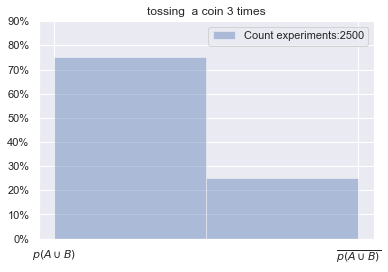

In [42]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    if arg == ['H' ,'H' , 'H'] or arg ==['H','H','T'] or arg==['H','T','H'] or arg==['T','H','H'] or arg ==['T','H','H'] or arg == ['T','T','H'] or arg== ['T','T','T']  :
        return r'$p(A\cup B)$'
    else:
        return r'$\overline{p(A\cup B)}$'
hist(2500,sample_space, times=3 ,experiment = experiment,title='tossing  a coin 3 times',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4"  color='#270336' >
  As expected . The result is $p(A\cup B)=75$%
</font>    

<font size="1" id="cond">... </font> 
<h2> Conditional probability </h2>

<font face = "Times New Roma" size="4"  color='#270336' >
Conditional probability is a measure of the probability of an event occurring given that another event has (by assumption, presumption, assertion or evidence) occurred matematicaly, it is defined as :<br>
$$p(A|B) = \frac{p(B\cap A)}{p(B)}$$
we read as what is the probability of A if B is occured     <br>
exampe : <br>
again 3 times fliping a coin .  $S = [HHH , HHT , HTH , HTT , THH , THT , TTH , TTT]$ <br> <br>
 $B = [HHH , HHT , HTH , HTT]$ (in first index to occur H) $P(B) = \frac{1}{2}= 50$%  <br> <br>
 $A= [HHH,HHT,HTH,THH] $ (to occur at least 2 heads)  $P(A) = \frac{1}{2}<= 50$% <br> <br>
 $p( B \cap A) = [HHT, HHH,HTH] =  \frac{3}{8} =37$%    <br> <br>

What is the probability of A if B is oocured ? <br>
Let to see the Venn diagram .
</font>    

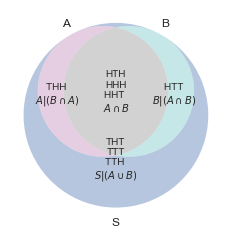

In [44]:
A = set(['HHH','HHT','HTH','THH'])
B = set(['HHH' , 'HHT' , 'HTH' , 'HTT'])

plot_ven(A,B,S,intersect=True,label_f=True)

<font face = "Times New Roma" size="4"  color='#270336' >
     The region wich is our target is $(A \cap B)$  the number of element in these region we will denote as
    $n((A \cap B))=N$ the number of elements in $B$ will be $K = n(b)$, then the probability of occuring A when B is occured <br> <br>
    $$\frac{n(A \cap B)}{ n(b) } = \frac{N}{K} = \frac{N/n(S)}{K/n(S)} = \frac{p(A \cap B)}{p(B)}$$

$$  = \frac{3/8}{1/2}=\frac{2}{3} = 0.75$$
Let to verify  Is 75% correct ?

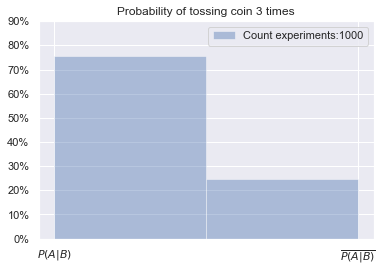

In [45]:
sample_space = np.array(['HHT','HHH','HTH','HTT'])
def experiment(arg) :
    if arg[0] == 'HHT'  or arg[0] =='HHH' or arg[0]=='HTH' :
        return r'$P(A|B)$'
    else:
        return r'$\overline {P(A|B)}$'
hist(1000,sample_space, times=1 ,experiment = experiment,title='Probability of tossing coin 3 times',bins=2,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4"  color='#270336' >
If A and B are independent events, the probability of this event happening can be calculated as shown below: <br>
$$ p (A \cap B ) = P(A)p(B)$$

examle: fliping a coin 3 times . Let event A_1 is  a occuring of H in first time    $p(A_1)=\frac{1}{2}$ The event in sencond time to occur H is  A_2 $\frac{1}{2}$ and in third time to occur T is $ A_3 = \frac{1}{2}$ 
<br> then
$P(A_1 \cap A_2 \cap A_3  ) = p(A_1).p(A_2).p(A_3) = \frac{1}{8}  $
</font>

<font face = "Times New Roma" size="4"  color='#270336' >
Theorem of total probability <br>


Suppose we have N number of mutually exclusive and exhaustive the sample space  events  $[B_1, B_2, B_3 ... B_n]$  
then for any event A of that sample space we can assume :
$$p(A) = p(A \cap B_1) \cup  p(A \cap B_2) \cup  p(A \cap B_i)...  p(A \cap B_n)  =  \sum_i^n P(A\cap B_i) $$ 
<br>
applying conditional probsability we can rewrite 
$$=\sum_i^n P(A|B_i).P(B_i) $$ 
</font>

<font size="1" id="bayes"  >... </font> 
<h2 color='#270336' face = "Times New Roma"> Bayes's Theorem </h2>



<font face = "Times New Roma" size="4"  color='#270336' >
Bayes’ theorem is stated mathematically as the following equation:
   $$ p(A|B) = \frac{p(B |A)p(A)}{p(B)} $$
   where $\displaystyle A$ and $\displaystyle B$  are events and $\displaystyle P(B)\neq 0$ $\displaystyle P(B)\neq 0$. <br> <br>
   proof:
<font>   

<h3  color='#270336' style="margin-right: 45px; margin-left: 45px">
<font face = "Times New Roma" size="4"  color='#270336' >    
from conditional probability we have :
    <br> <br>
    $1)\;\;p(A|B)p(B) = p(B\cap A)$ 
   <br> <br>
  respectively for probabily of event B given A
  <br> <br>
$2) \; \;p(B|A)p(A) = p(A\cap B) $
<br> <br>
using commutative law of intersection operator <br> <br>
$A\cap B= B \cap A$ 
<br> <br>
and plug eq(2) to eq(1) we achieve <br> <br>
$\;p(B|A)p(A) = p(A\cap B) = p(B \cap A) = p(A|B)p(B) $  <br> <br>
$ 	\Rightarrow p(A|B) = \frac{p(B |A)p(A)}{p(B)} $ <br> <br>
or

$p(B|A) = \frac{p(A|B)p(B)}{p(A)} $

<br> <br>

if events are mutualy excusive : then : 
<br> <br>
 $p (A \cap B ) = 0$
 for bayes formula we have : 
<br> <br>
$p(A|B) = \frac{0.p(A)}{p(B)} =  0 $
</font>
</h3>

<font size="1" id="random">... </font> 
<h2>Discrete random variables </h2>

<font face = "Times New Roma" size="4"  color='#270336' >
 A discrete random variable is a function X (s) from a finite or countably infinite sample space S to the real numbers
<br> <br>
 example : <br>   
 When we toss a coin 3 times and record the results in the sequence that they occur, then the sample space is <br> <br>
$$ S = [ HHH,\; HHT,\; HTH ,\; HTT ,\; THH ,\; THT ,\; TTH ,\; TTT ]$$
 an example for random variables are : <br>
    
  X(s) the number of head in sequnece e.g X(T,T,H) =1 
  <br>
  Y(s) first index to be H  e.h Y(H,T,H)
</font>  

<font face = "Times New Roma" size="4"  color='#270336' >
    example : let our sample space again is $ S = [ HHH,\; HHT,\; HTH ,\; HTT ,\; THH ,\; THT ,\; TTH ,\; TTT ]$
    tossing the coin free times. <br>
    let X=2 corespnds to number of accured heads,for example X = [HHT,HTH,THH].
    if we write $0<X\leq 3$  then X(s)= [HHH , HHT , HTH , THH ] <br>
    The probability of occuring $P(x=2) = \frac{3}{8}$ for $(0<X\leq 3) = \frac{4}{8}$.
    Let to perform an exeriment of accouring H precisly x=n times : 
    $p(x=0) =  \frac{1}{8} $   corespons to [TTT] <br>
    $p(x=1) = \frac{3}{8} $ corespons to    [HTT,THT,TTH] <br>
    $p(X=2)=  \frac{3}{8} $ corespons to    [HHT,HTH,THH] <br>
    $p(X=3)= \frac{1}{8} $  corespons to   [HHH] <br>
</font>    

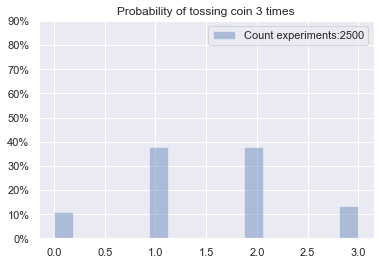

In [103]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    coun_occured = 0
    if arg[0] == 'H':
        coun_occured +=1  
    if arg[1] == 'H':
        coun_occured +=1    
    if arg[2] == 'H':
        coun_occured +=1      
    #rest = r'$P( 0<X \leq {} )$'.format(coun_occured) 
    return coun_occured

hist(2500,sample_space, times=3 ,experiment = experiment,dist=False,title='Probability of tossing coin 3 times',bins=16,y_scalled=(0,0.9))

<font face = "Times New Roma" size="4"  color='#270336' >
 The above graphics is also called distrition of X
 $ S = [ HHH,\; HHT,\; HTH ,\; HTT ,\; THH ,\; THT ,\; TTH ,\; TTT ] $ <br> <br>
    $p(X\leq 0) =  \frac{1}{8} =12$%   corespons to [TTT] <br> <br>
    $p(1 \leq X\leq1) = p(1) =  \frac{3}{8} =37 $% corespons to    [HTT,THT,TTH] <br> <br>
    $p(1 \leq X\leq2)= p(1) +p(2) =\frac{6}{8} $ =75% corespons to    [HHT,HTH,THH,HTT,THT,TTH] <br> <br>
    $p(1 \leq X\leq3)=  p(1) +p(2) +p(3) =\frac{7}{8} $ = 85% corespons to    [HHH,HHT,HTH,THH,HTT,THT,TTH] <br>  <br>   

No handles with labels found to put in legend.


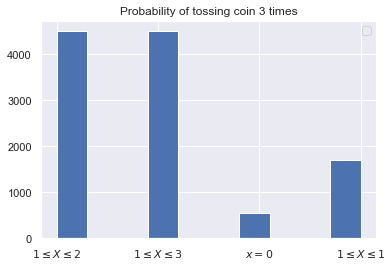

In [117]:
sample_space = np.array(['H','T'])
def experiment(arg) :
    coun_occured = 0
    result = np.array([])
    if arg[0] == 'H':
        coun_occured +=1  
    if arg[1] == 'H':
        coun_occured +=1    
    if arg[2] == 'H':
        coun_occured +=1  
    
    if coun_occured== 0 :
        result =np.append(result, r'$ x = 0 $')  
    if coun_occured == 1  :
        result =np.append(result, r'$ 1 \leq X\leq1   $')  
    if coun_occured >= 1 or  coun_occured <=2 :
        result =np.append(result, r'$1 \leq X\leq2$')     
    if coun_occured >= 1 or  coun_occured <=3 :
        result =np.append(result, r'$1 \leq X\leq3$')  
    #print(result)    
    return result

hist(4500,sample_space, times=3 ,experiment = experiment,dist=True,title='Probability of tossing coin 3 times',bins=5)

<font size="1" id="expectation">... </font> 
<h2>Variance and Standard Deviation</h2>

<font face = "Times New Roma" size="4"  color='#270336' >
    Expected value of descrete random variable X is defined as : <br> 
    $$ E[X] = \sum_ix_i.P(X=x_i)$$
 Expected value of rolling of die is : <br>
   $E[X] = 1.\frac{1}{6} +2.\frac{1}{6}+3.\frac{1}{6}+4.\frac{1}{6}+5.\frac{1}{6}+6.\frac{1}{6} = \frac{21}{6} =3.5 $
   properties : 

<h3  color='#270336' style="margin-right: 45px; margin-left: 45px">
<font face = "Times New Roma" size="4"  color='#270336' >    
  $1 ) \;E[aX+b] = aE[X] +b $ linear <br> <br>
  $2 )  \;E[XY] = E[X] E[Y ] $ If X and Y are independent  <br> <br>
  $3) \;E[X + Y ] = E[X] + E[Y ]$
    
 </font>
</h3>

<font face = "Times New Roma" size="4"  color='#270336' > 
  let to perform experiment of roling die 6 times and sum up the outcomes,
    the all posible outcomes are $6\times6$ = 36
    
</face>   

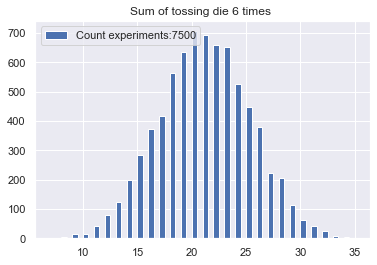

In [151]:
space = np.array([1,2,3,4,5,6]) #die
def experiment(arg) :
    #print(arg)
    result = np.sum(arg)    
    return result
hist(7500,space, times=6 ,experiment = experiment,dist=True,title='Sum of tossing die 6 times ',bins=56)

<font face = "Times New Roma" size="4"  color='#270336' > 
    The $mean$ value  $\eta = E[x] $ in our example $\eta \approx 21$  or $\in[20,23]$
    wich can be consider as expected value :
    let to try to find the exprexted value :
    $\eta = E[x_1 + x_2 + x_3 + x_4 + x_6 + x_6]$ where $[x_1 .. x_i]$ is expected value of roling die wich we've shown above that E[X] = 3.5, ofcourse for all $x_i$ then we can write <br> $\eta = E[6x] $ 
   using property 1 we can write $\eta =6 E[x] = 6*3.5 =21$ from above graphic  proof it experimentaly. <br>
   moreover we can write for n time roling of die expected sum is $n.E[x]=n.3.5$
   let to perform a experiment when n = 20 then we expect $20.3.6=70$ to be the mean
</font>   

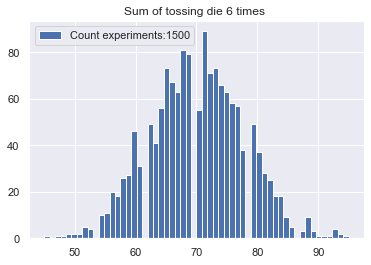

In [144]:
space = np.array([1,2,3,4,5,6]) #die
def experiment(arg) :
    #print(arg)
    result = np.sum(arg)    
    return result

hist(1500,space, times=20 ,experiment = experiment,dist=True,title='Sum of tossing die 6 times ',bins=56)



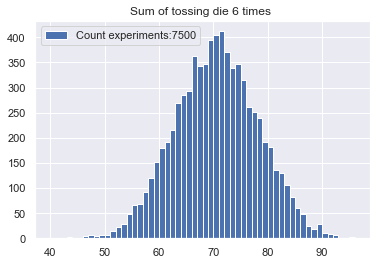

In [150]:
hist(7500,space, times=20 ,experiment = experiment,dist=True,title='Sum of tossing die 6 times ',bins=56)

<font face = "Times New Roma" size="4"  color='#270336' > 
    From the above graphics, we can see that most of the result are clustered around $\eta = 70$
</font>   

<font face = "Times New Roma" size="4"  color='#270336' > 
   Variance referers to the spead of dataset. It is measurment to indentify how far each in dataset is from mean value is from the mean.The larger value of variance means more spread of data
    $Var(X) = E[(X-\eta)^2] = \sum_i (x_i - \eta)^2 p(x_i)$
  for the sample data  $Var(X) = \sum_i \frac{(x_i- \eta)}{N}$ <br>
  <br>
  
  standart deviation ?
  example direct form dataset and from proability theory ?
</font>   

# ?????